In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [9]:
DATA_DIR = '/Users/andishetavakkoli/Documents/notebook/github_project/machine-learning-projects-data/credit_score'

In [10]:
df_train = pd.read_csv(DATA_DIR +'/train.csv')
df_test = pd.read_csv(DATA_DIR +'/test.csv')

In [11]:
df_train.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


# Cncate train and test df

In [12]:
df_train.shape

(100000, 28)

In [13]:
df_train.describe(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [14]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [159]:
df = pd.concat([df_train, df_test], ignore_index=True)

<AxesSubplot:>

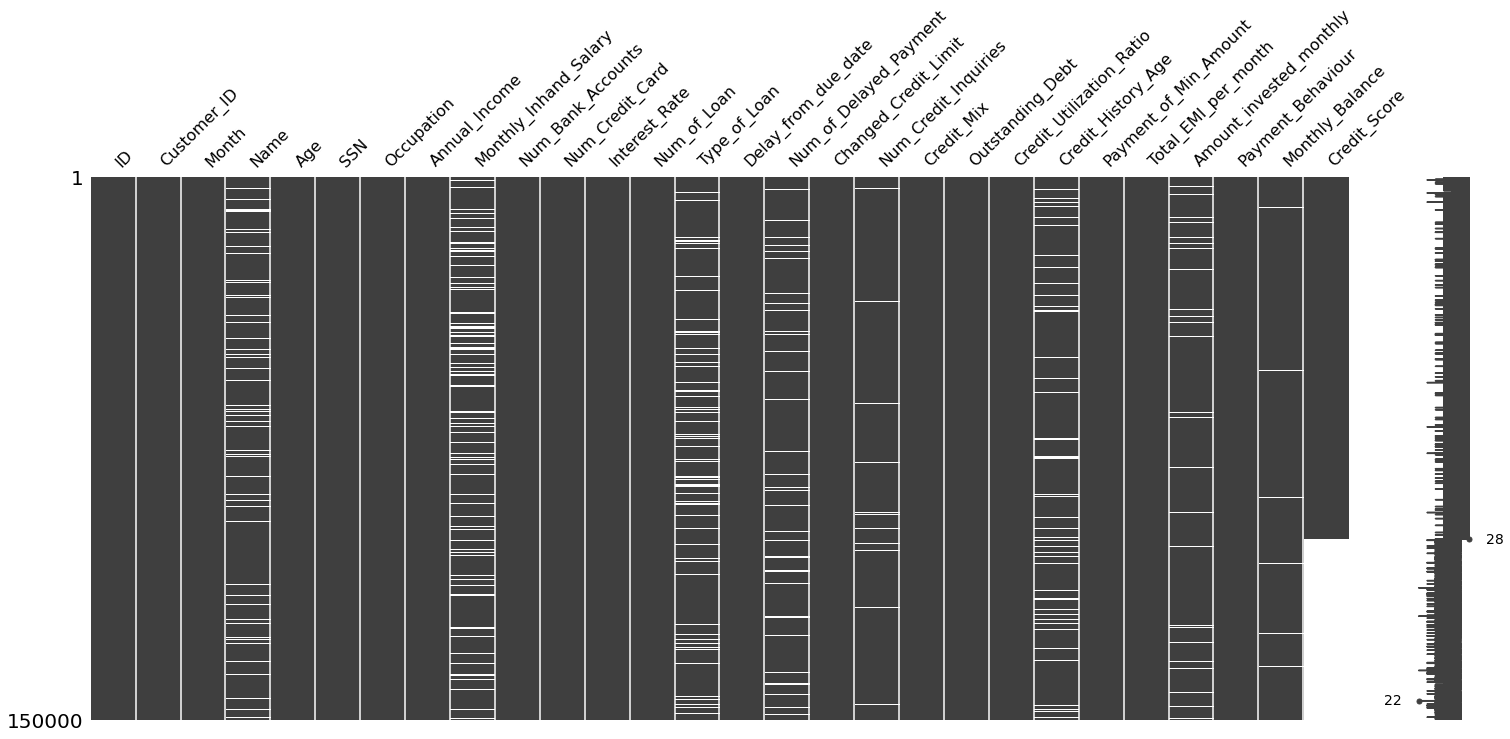

In [23]:
msno.matrix(df)

In [21]:
for col in df.columns:
    print(f'column name: {col}')
    print(df[col].value_counts(dropna=False))
    print('*'* 50)

column name: ID
0x1602     1
0x162e     1
0x25fea    1
0x25feb    1
0x25fec    1
          ..
0x13afa    1
0x13afb    1
0x13afc    1
0x13afd    1
0x25ff1    1
Name: ID, Length: 150000, dtype: int64
**************************************************
column name: Customer_ID
CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: Customer_ID, Length: 12500, dtype: int64
**************************************************
column name: Month
January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
September    12500
October      12500
November     12500
December     12500
Name: Month, dtype: int64
**************************************************
column name: Name
NaN                    15000
Stevex                    66
Langep                    65
Jessicad    

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: Payment_Behaviour, dtype: int64
**************************************************
column name: Monthly_Balance
NaN                                 1762
__-333333333333333333333333333__      15
600.1125089726384                      1
120.54247208897846                     1
784.0174708573453                      1
                                    ... 
279.9825060023594                      1
260.67157274114965                     1
250.4915113003876                      1
243.8753153006728                      1
360.37968260123847                     1
Name: Monthly_Balance, Length: 148225, dtype: int64
**************************************************
column name: Credit_Score
Standard

# Correct Data Type

In [27]:
df.select_dtypes(include='object').columns.to_list()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

### Month

In [114]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month

In [115]:
# for item in df['Customer_ID']:
#     if len(item)< 5:
#         print(item)

### Name

In [116]:
df['Name'] = df['Name'].fillna('Unknown')

### Age

In [117]:
df['Age'] = df['Age'].str.replace('_', '').replace('-', '').replace("-", "")

In [118]:
df['Age'].replace('-500', np.nan, inplace=True)

In [119]:
df['Age'] = df['Age'].astype('float')

In [121]:
# [item for item in df['Age'] if not item.isdigit()]

### SSN

In [129]:
df['SSN'] = df['SSN'].replace('#F%$D@*&8', 'unknown')

In [134]:
for item in df['SSN']:
    
    if isinstance(item, str):
    
        if re.findall(r'\b\d{3}-\d{2}-\d{4}\b', item) == False:
            print(item)
    

### Occupation

In [135]:
df['Occupation'] = df['Occupation'].replace('_______', np.nan)

### Annual_Income

In [139]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

In [145]:
df['Annual_Income'] = df['Annual_Income'].astype('float')

### Num_of_Loan

In [143]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')

In [146]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int')

In [147]:
df['Num_of_Loan'].value_counts(dropna=False)

3       22618
2       22547
4       22111
0       16376
1       15901
        ...  
1085        1
742         1
291         1
365         1
1442        1
Name: Num_of_Loan, Length: 600, dtype: int64

###  Type of Loan

In [150]:
df['Type_of_Loan'] = df['Type_of_Loan'].astype('category')

### Num of Delayed Payment

In [161]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')

### Changed Credit Limit

In [163]:
df['Changed_Credit_Limit'].replace('_', np.nan, inplace=True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')

### Credit Mix

In [164]:
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', 'unknown')
df['Credit_Mix'] = df['Credit_Mix'].astype('category')

### Outstanding Debt

In [166]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')

### Credit History Age

In [167]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype('category')

In [187]:
def split_year_month(date, is_month=None):
    date = date.replace('Years', '').replace('Months', '')
    date_list = date.split('and')
    
    if is_month:
        return int(date_list[1].strip())
    
    return int(date_list[0].strip())
    

In [190]:
df['Credit_History_Age_Month'] = df['Credit_History_Age'].apply(lambda x: split_year_month(x, is_month=True))

In [192]:
df['Credit_History_Age_Year'] = df['Credit_History_Age'].apply(lambda x: split_year_month(x))

### Payment of Min Amount

In [194]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('category')

### Amount invested monthly

In [199]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__', '10000')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

### Payment Behaviour

In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('!@9#%8', np.nan)
